# Logistic Regression Practice

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab

%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 10]

%config Completer.use_jedi = False

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
heart_df = pd.read_csv("~/PycharmProjects/Datasets/framingham.csv")
heart_df.drop(['education'], axis=1, inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

In [5]:
heart_df.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
heart_df.isnull().sum()/len(heart_df)

Sex_male           0.000000
age                0.000000
currentSmoker      0.000000
cigsPerDay         0.006840
BPMeds             0.012500
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011792
sysBP              0.000000
diaBP              0.000000
BMI                0.004481
heartRate          0.000236
glucose            0.091509
TenYearCHD         0.000000
dtype: float64

In [7]:
heart_df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [9]:
heart_df.dropna(axis=0,inplace=True) # самый простой вариант, можно было бы поступить и умнее
# Например, можно же и заполнить пропуски средним, медианой, модой, kNN использовать.

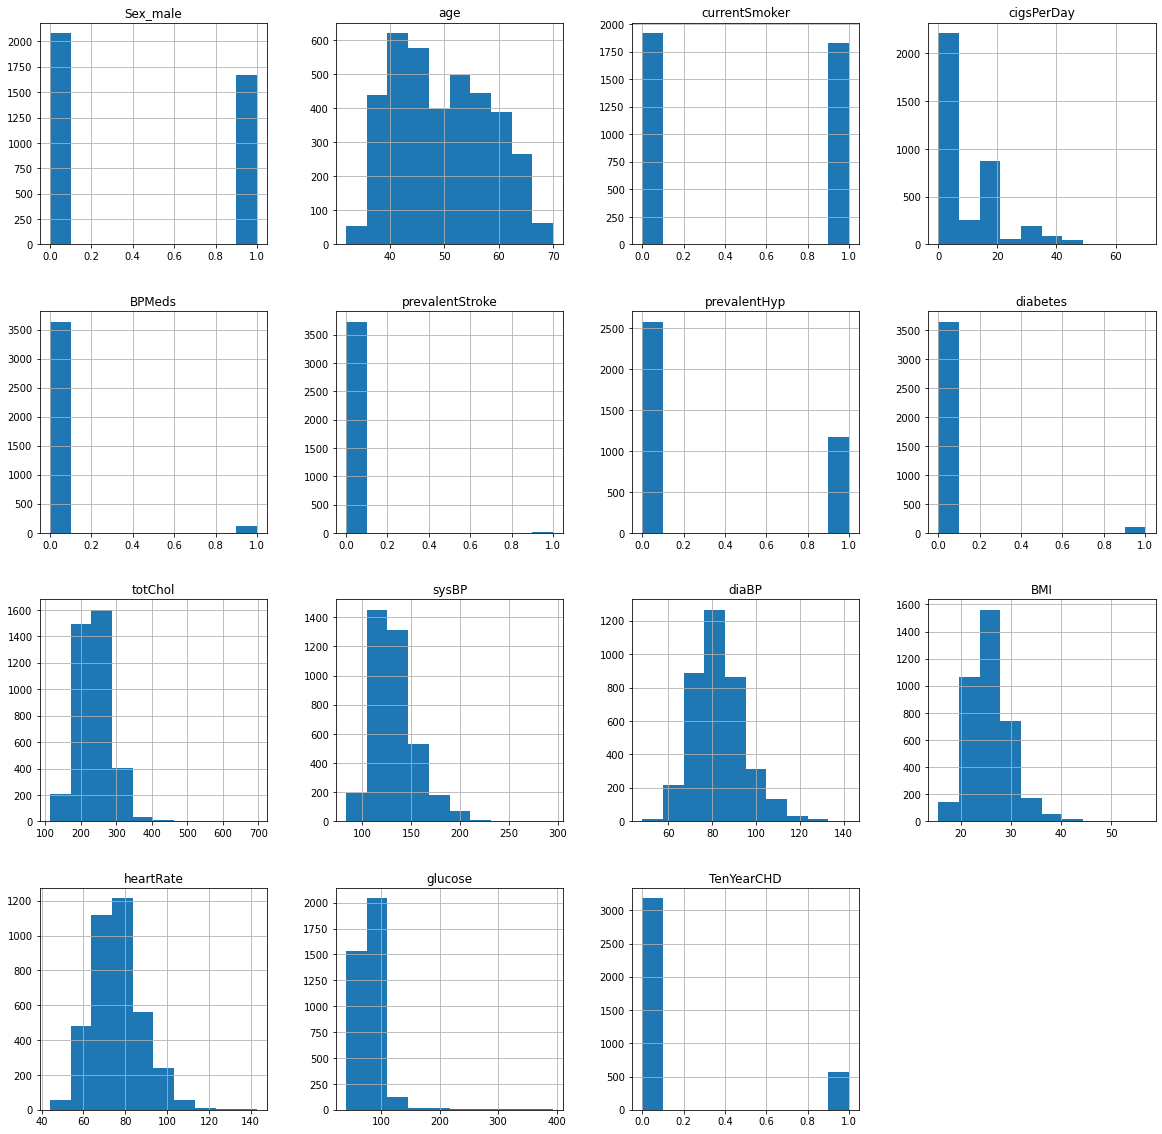

In [10]:
heart_df.hist(figsize=(20, 20));

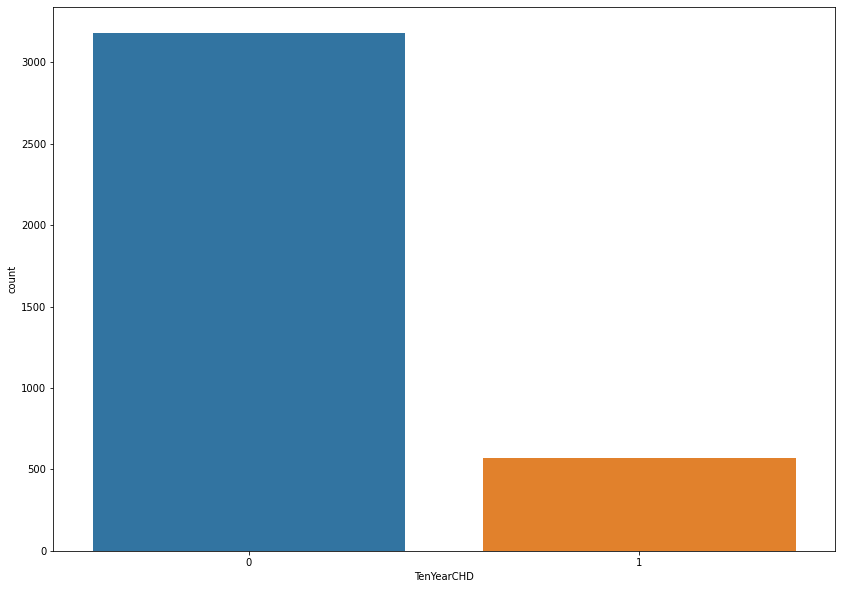

In [11]:
sns.countplot(x='TenYearCHD',data=heart_df);

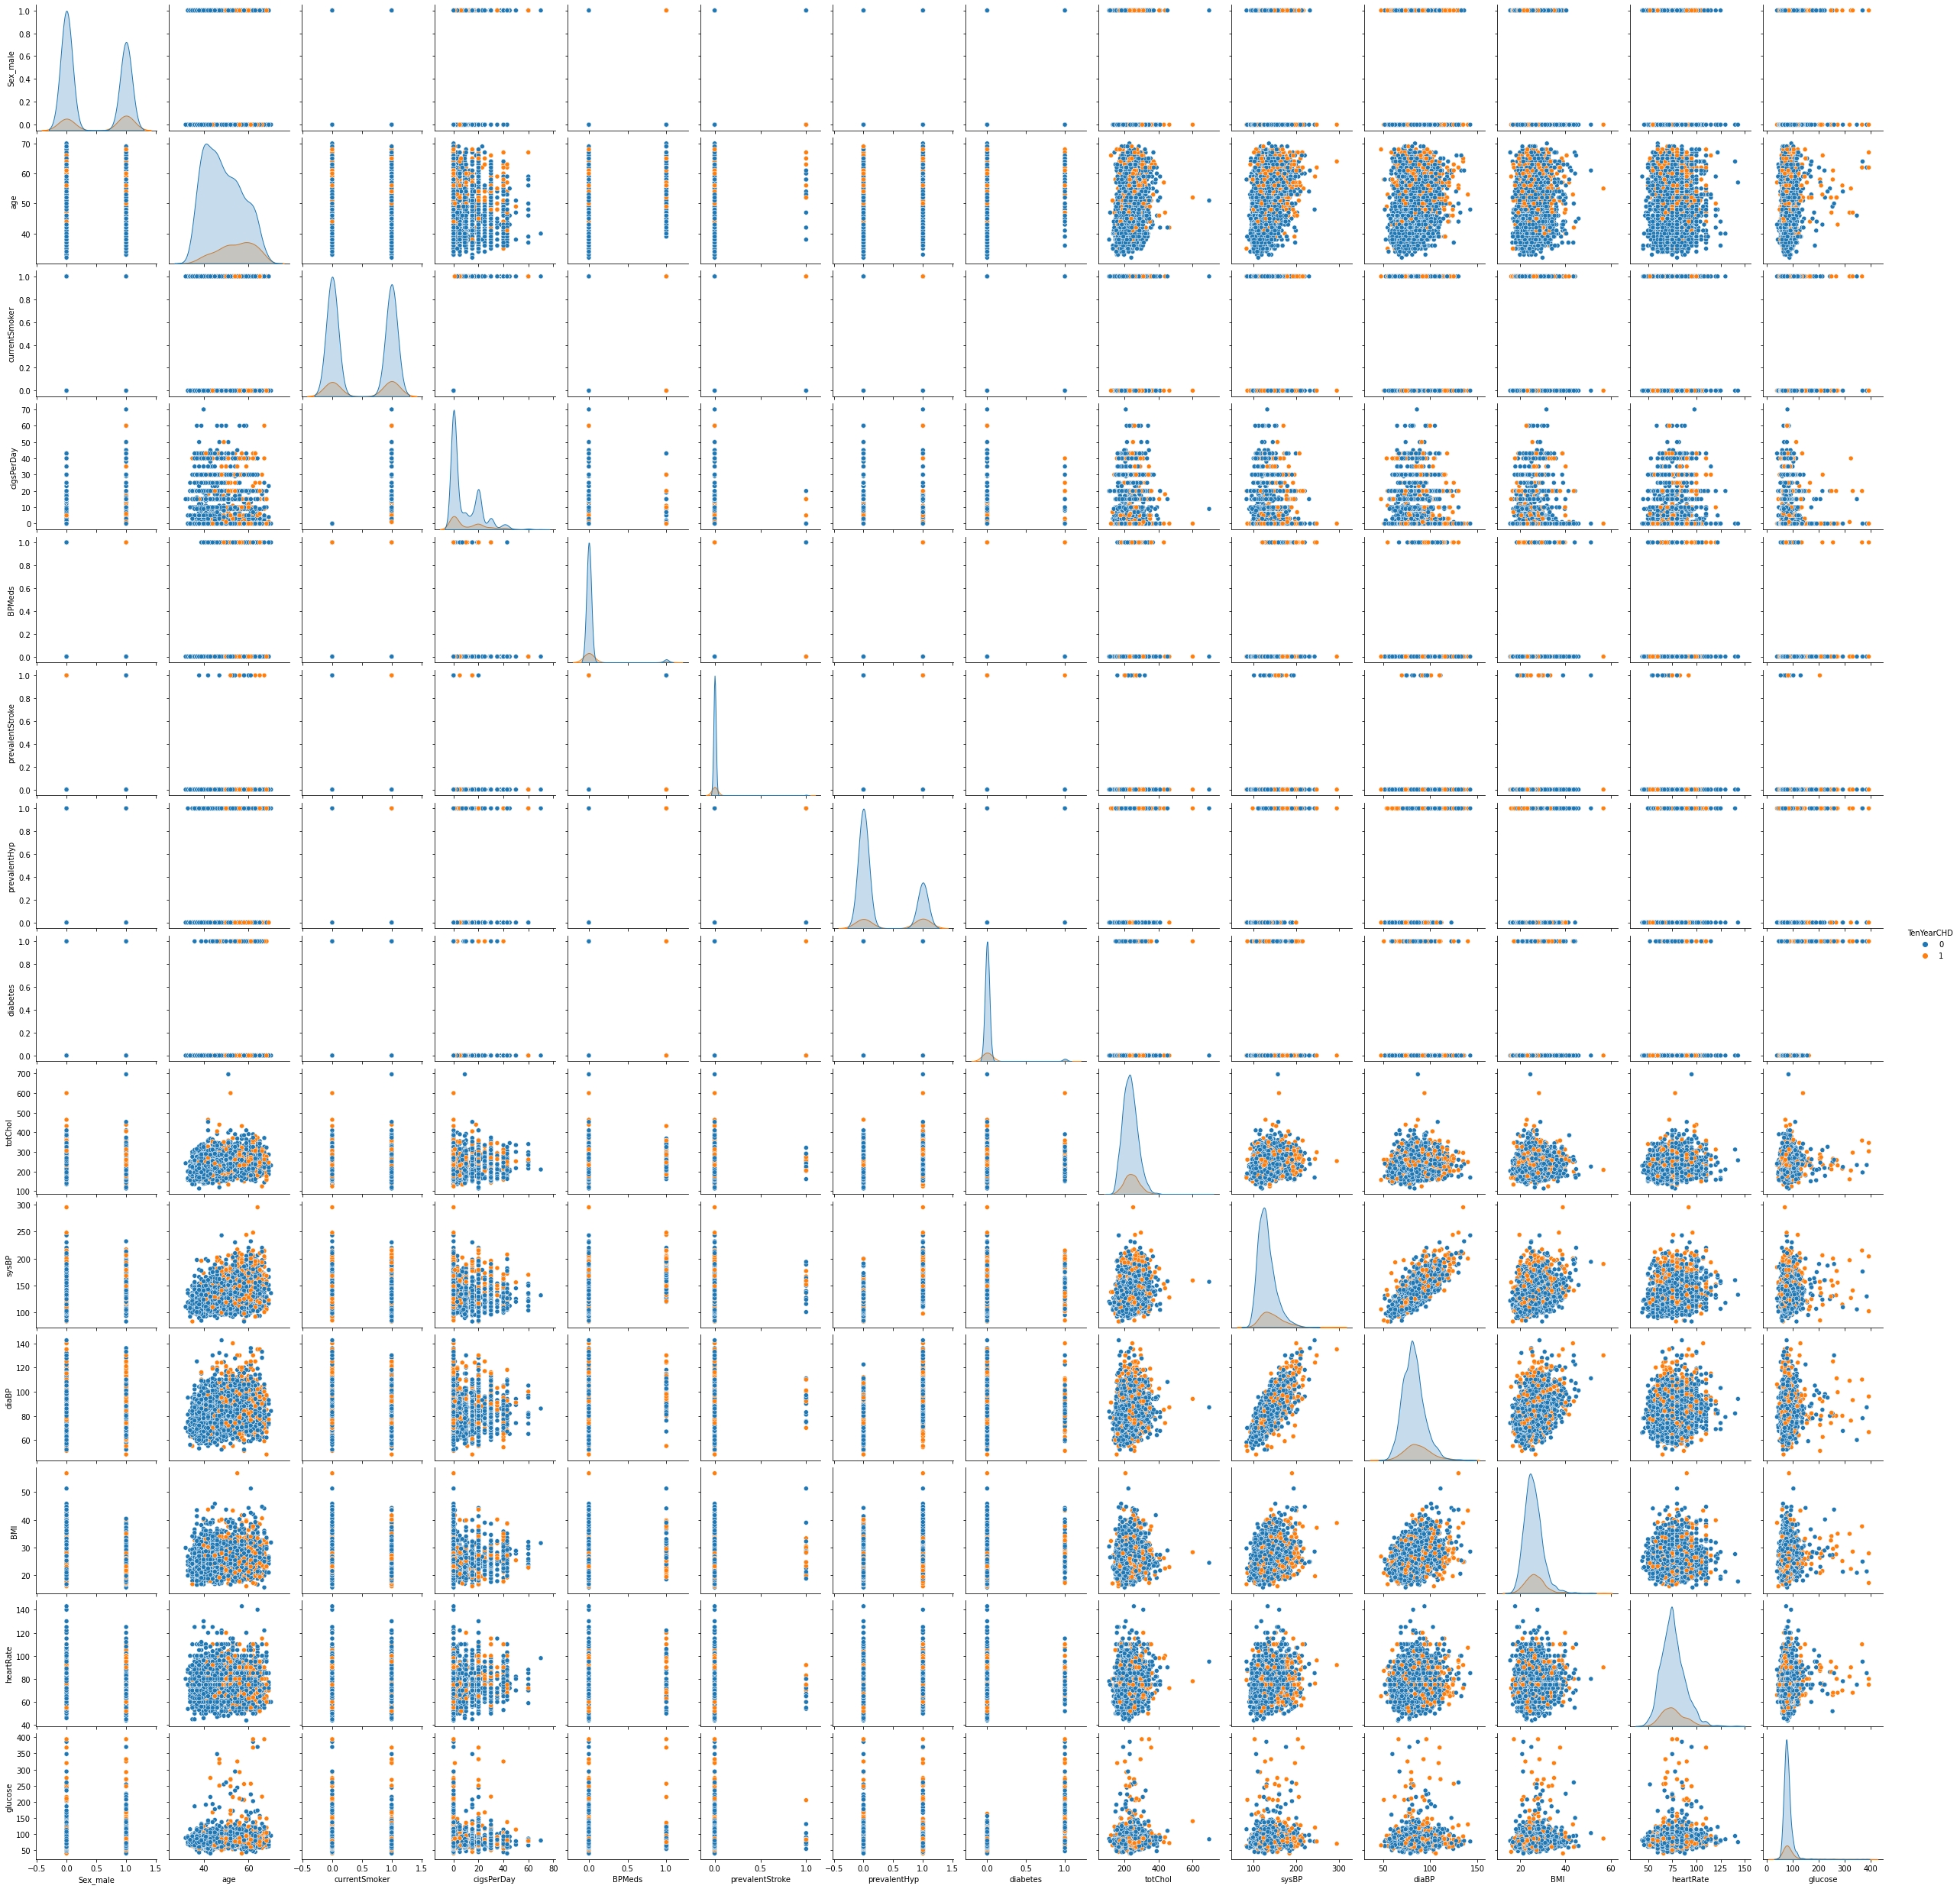

In [12]:
sns.pairplot(data=heart_df, hue='TenYearCHD')

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [14]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    heart_df.drop(['TenYearCHD'], axis=1), 
    heart_df['TenYearCHD'], 
    test_size=0.20, 
    random_state=42, 
    stratify=heart_df['TenYearCHD']
)

# стандартизируем
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.855
Precision: 0.098
Recall: 0.652
f1_score: 0.171

Test quality:
Accuracy: 0.847
Precision: 0.043
Recall: 0.500
f1_score: 0.080


<AxesSubplot:xlabel='feature', ylabel='importance'>

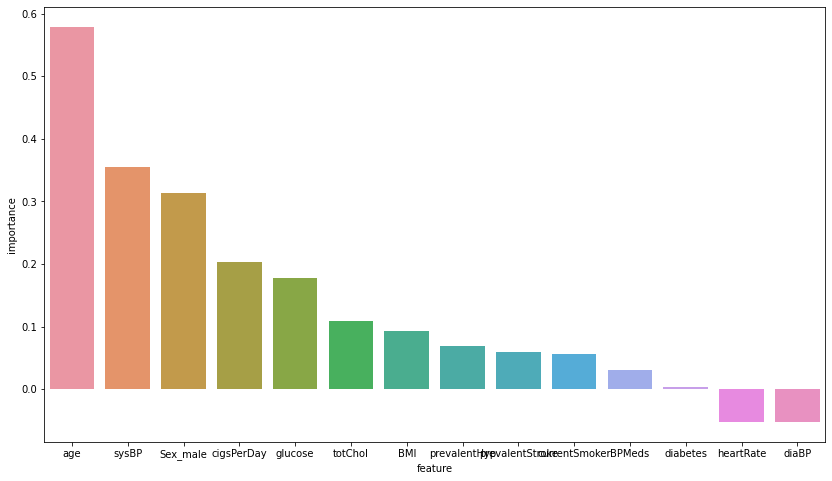

In [17]:
feature_importance = pd.DataFrame({"feature": heart_df.drop('TenYearCHD', axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

feature_importance.set_index('feature', inplace=True)
feature_importance.sort_values(["importance"], ascending=False, inplace=True)
plt.figure(figsize=(14, 8))
sns.barplot(data=feature_importance, y="importance", x=feature_importance.index)

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

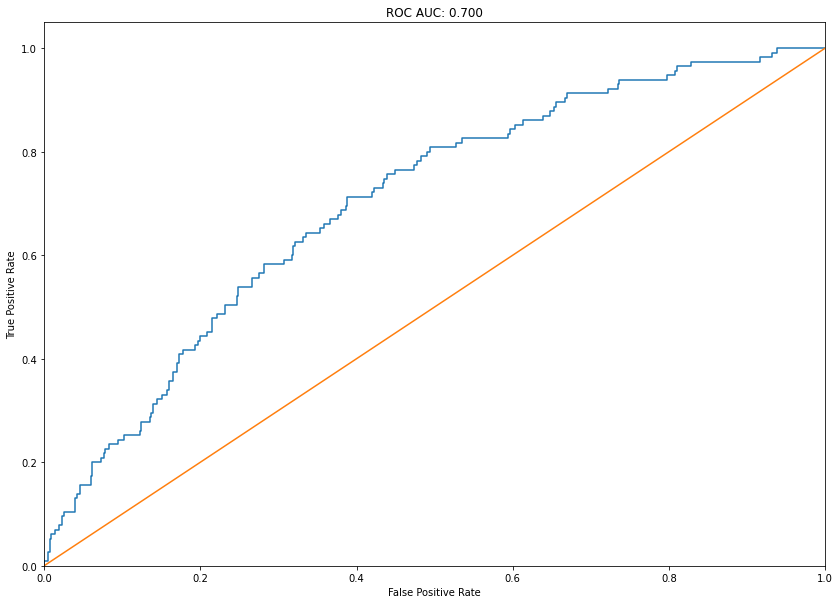

In [19]:
plot_roc_curve(log_reg.predict_proba(X_test_scaled)[:,1], y_test)

In [20]:
log_reg_cv = LogisticRegressionCV(Cs=100)
log_reg_cv.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg_cv.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg_cv.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.856
Precision: 0.083
Recall: 0.731
f1_score: 0.149

Test quality:
Accuracy: 0.844
Precision: 0.026
Recall: 0.375
f1_score: 0.049


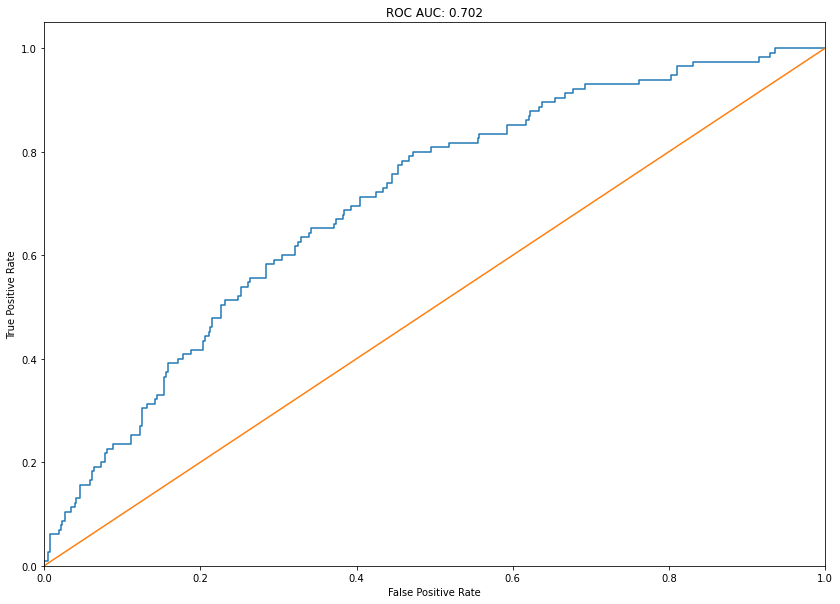

In [21]:
plot_roc_curve(log_reg_cv.predict_proba(X_test_scaled)[:,1], y_test)

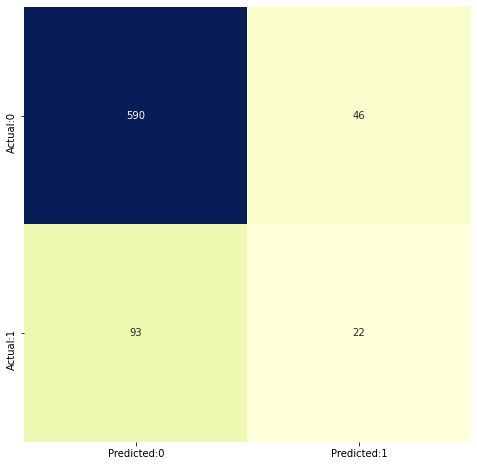

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, log_reg_cv.predict_proba(X_test_scaled)[:, 1] > 0.3) # стоит менять порог

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

# Эконометрический подход

In [23]:
import statsmodels.api as sm

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=heart_df.columns[:-1])

In [25]:
X_train_scaled.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.124345,-0.299919,1.016130,0.932259,-0.182794,-0.079835,-0.678125,-0.170762,1.052853,0.210323,0.684277,0.375505,-0.216992,-0.870632
1,1.124345,-0.880182,1.016130,0.932259,-0.182794,-0.079835,1.474654,-0.170762,0.516511,-0.017472,0.261997,0.976408,-0.049258,-0.662603
2,-0.889407,-0.764129,1.016130,0.932259,-0.182794,-0.079835,-0.678125,-0.170762,-1.651201,-1.270344,-1.511580,-1.971231,-0.049258,-0.454573
3,-0.889407,0.512450,-0.984126,-0.753359,-0.182794,-0.079835,1.474654,-0.170762,1.455109,3.536128,3.766922,1.525381,-0.636327,-0.121725
4,1.124345,1.208766,-0.984126,-0.753359,-0.182794,-0.079835,-0.678125,-0.170762,-1.204250,-0.837533,-1.089300,-0.556760,-0.049258,-0.953844


In [26]:
'y ~ data.x'

'y ~ data.x'

In [27]:
model = sm.Logit(y_train.values, X_train_scaled)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.664062
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2986
Method:                           MLE   Df Model:                           13
Date:                Sat, 23 Jan 2021   Pseudo R-squ.:                 -0.5561
Time:                        22:28:40   Log-Likelihood:                -1992.2
converged:                       True   LL-Null:                       -1280.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Sex_male            0.1377      0.041      3.366      0.001       0.058       0.218
age                 0.2656      0.044      6.103      0.000       0.180       0.351
currentSmoker       0.0300      0.060      0.503      0.615      -0.087       0.147
cigsPerDay          0.1031      0.061      1.687      0.092      -0.017       0.223
BPMeds              0.0398      0.042      0.953      0.341      -0.042       0.122
prevalentStroke     0.0504      0.042      1.206      0.228      -0.031       0.132
prevalentHyp        0.0258      0.054      0.478      0.632      -0.080       0.132
diabetes            0.0218      0.050      0.439      0.660      -0.076       0.119
totChol             0.0226      0.040      0.568      0.570      -0.055       0.101
sysBP               0.2515      0.075      3.345      0.001       0.104       0.399
diaBP              -0.0674      0.066     -1.027      0.304      -0.196       0.061
BMI                 0.0326      0.042      0.779      0.436      -0.049       0.115
heartRate          -0.0231      0.040     -0.584      0.559      -0.101       0.054
glucose             0.1405      0.054      2.600      0.009       0.035       0.246
===================================================================================
"""

In [28]:
# result.pvalues < 0.05
result.params[result.pvalues < 0.05]

Sex_male    0.137673
age         0.265564
sysBP       0.251548
glucose     0.140523
dtype: float64

In [29]:
result.pvalues.max()

0.6603647656516471

In [30]:
col = X_train_scaled.columns

In [31]:
col

Index(['Sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [32]:
model = sm.Logit(y_train.values, X_train_scaled)
result = model.fit()
result.summary()
col = X_train_scaled.columns

for iteration in range(len(col)):
    
    model = sm.Logit(y_train.values, X_train_scaled[col])
    result = model.fit()
    
    potentially_bad = np.argmax(result.pvalues)
    
    if result.pvalues.max() > 0.05:
        col = [c for c in col if c != potentially_bad] 

Optimization terminated successfully.
         Current function value: 0.664062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664062
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664062
  

In [33]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2986
Method:                           MLE   Df Model:                           13
Date:                Sat, 23 Jan 2021   Pseudo R-squ.:                 -0.5561
Time:                        22:28:41   Log-Likelihood:                -1992.2
converged:                       True   LL-Null:                       -1280.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Sex_male            0.1377      0.041      3.366      0.001       0.058       0.218
age                 0.2656      0.044      6.103      0.000       0.180       0.351
currentSmoker       0.0300      0.060      0.503      0.615      -0.087       0.147
cigsPerDay          0.1031      0.061      1.687      0.092      -0.017       0.223
BPMeds              0.0398      0.042      0.953      0.341      -0.042       0.122
prevalentStroke     0.0504      0.042      1.206      0.228      -0.031       0.132
prevalentHyp        0.0258      0.054      0.478      0.632      -0.080       0.132
diabetes            0.0218      0.050      0.439      0.660      -0.076       0.119
totChol             0.0226      0.040      0.568      0.570      -0.055       0.101
sysBP               0.2515      0.075      3.345      0.001       0.104       0.399
diaBP              -0.0674      0.066     -1.027      0.304      -0.196       0.061
BMI                 0.0326      0.042      0.779      0.436      -0.049       0.115
heartRate          -0.0231      0.040     -0.584      0.559      -0.101       0.054
glucose             0.1405      0.054      2.600      0.009       0.035       0.246
===================================================================================
"""

In [37]:
from sklearn.feature_selection import RFE

In [39]:
rfe = RFE(log_reg) 
rfe = rfe.fit(X_train_scaled, y_train)
print(rfe.support_)
print(rfe.ranking_) 

[ True  True False  True False False False False  True  True False  True
 False  True]
[1 1 5 1 7 3 2 8 1 1 4 1 6 1]


In [69]:
from statsmodels.formula.api import logit

In [77]:
model = logit("TenYearCHD ~ Sex_male + age + cigsPerDay + sysBP + glucose", data = heart_df)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378541
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3745
Method:                           MLE   Df Model:                            5
Date:                Sat, 23 Jan 2021   Pseudo R-squ.:                  0.1135
Time:                        22:49:12   Log-Likelihood:                -1419.9
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.063e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6973      0.416    -20.905      0.000      -9.513      -7.882
Sex_male       0.5523      0.104      5.303      0.000       0.348       0.756
age            0.0668      0.006     10.628      0.000       0.054       0.079
cigsPerDay     0.0200      0.004      4.874      0.000       0.012       0.028
sysBP          0.0178      0.002      8.427      0.000       0.014       0.022
glucose        0.0076      0.002      4.598      0.000       0.004       0.011
==============================================================================
"""

In [82]:
result.aic

2851.8180700631315